In [1]:
import os
import scipy.io
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from PIL import Image 
from data import load_new_data, data_convert
from keras.layers import Input, Add, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,concatenate,Cropping2D
from keras.models import Model
import time

from tensorflow import set_random_seed


Using TensorFlow backend.
C:\Users\USER\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\anaconda3\envs\MNIST\lib\site-packag

In [2]:

pixel=28
    
if os.path.isdir('model'):
    print("model dir exist")
else:
    print("create model dir")  
    os.mkdir('model')
    
if os.path.isfile('data.mat'):
    print ('data.mat already exist')
    #data_convert (new_astype='uint8', new_size=pixel)
else:
    #data_convert (new_astype='uint8', new_size=pixel)
    data_convert (new_size=pixel)



model dir exist
data.mat already exist



-----------------check_mat------------------
data keys : dict_keys(['__header__', '__version__', '__globals__', 'train_data', 'train_label', 'test_data', 'test_label'])
train_data shape : (55000, 28, 28)
img pixel type : <class 'numpy.float32'>
check_mat train label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


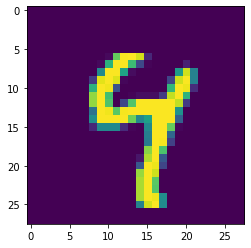

train_data.shape: (55000, 28, 28)
train_label.shape: (55000, 10)
test_data.shape: (10000, 28, 28)
test_label.shape: (10000, 10)
------------------------------------
train_data.shape: (55000, 28, 28, 1)
train_label.shape: (55000, 10)
test_data.shape: (10000, 28, 28, 1)
test_label.shape: (10000, 10)


In [3]:

train_data,train_label,test_data,test_label=load_new_data(True) # load data from 'data.mat

print ("train_data.shape:",train_data.shape)
print ("train_label.shape:",train_label.shape)
print ("test_data.shape:",test_data.shape)
print ("test_label.shape:",test_label.shape)

train_data=train_data.reshape(train_data.shape[0],pixel,pixel,1) # 三維 to 四維
test_data=test_data.reshape(test_data.shape[0],pixel,pixel,1)

print ("------------------------------------")
print ("train_data.shape:",train_data.shape)
print ("train_label.shape:",train_label.shape)
print ("test_data.shape:",test_data.shape)
print ("test_label.shape:",test_label.shape)








    

In [19]:

# In[2]:   Hyperparameter

BATCH_SIZE = 256 #change there
NUM_EPOCHS = 15
TRAIN_DATA = 0.5
VAL = 0.2

TRAIN_DATA=int (1/TRAIN_DATA)
train_data = train_data [::TRAIN_DATA]
train_label = train_label [::TRAIN_DATA]
print ("train_data.shape:",train_data.shape)
print ("train_label.shape:",train_label.shape)

'''
BATCH_SIZE = 256 #change there
NUM_EPOCHS = 35
TRAIN_DATA = 1 
VAL = 0.2

TRAIN_DATA=int (1/TRAIN_DATA)
train_data = train_data [::TRAIN_DATA]
train_label = train_label [::TRAIN_DATA]
print ("train_data.shape:",train_data.shape)
print ("train_label.shape:",train_label.shape)
'''

train_data.shape: (13750, 28, 28, 1)
train_label.shape: (13750, 10)


'\nBATCH_SIZE = 256 #change there\nNUM_EPOCHS = 35\nTRAIN_DATA = 1 \nVAL = 0.2\n\nTRAIN_DATA=int (1/TRAIN_DATA)\ntrain_data = train_data [::TRAIN_DATA]\ntrain_label = train_label [::TRAIN_DATA]\nprint ("train_data.shape:",train_data.shape)\nprint ("train_label.shape:",train_label.shape)\n'

In [5]:

# In[3]:
def model_NN(input_shape):
    X_input = Input(input_shape)
    W1 = Flatten()(X_input)
#--------------------------------D1--------------------------------------------    
    D1 = Dense(256, activation='relu', name='fc1')(W1) # Hidden layer 
    # activation can be relu 
    W1 = Dropout(0.5)(W1) 
    #D1 = Dense(64, activation='relu', name='fc2')(D1) # Hidden layer 
#--------------------------------O1--------------------------------------------    
    O1 = Dense(10, activation='softmax', name='out')(D1)    
    
    model_NN = Model(inputs = X_input, outputs = O1 ,name='NN') # spec. input output name
    return model_NN


In [6]:

# In[4]:  training setup
complete_time=time.strftime("%Y_%m_%d %H_%M_%S", time.localtime()) # Record time info.
from keras.callbacks import ModelCheckpoint
if VAL !=0:
    # Training Tips: save best weights during training
    checkpoint = ModelCheckpoint("model/Best_NN_weights_{epoch:02d}_{val_loss:.2f}.h5", 
                                 monitor='val_loss', verbose=0,save_best_only=True, mode='auto', period=1)
    
NN=model_NN((pixel,pixel,1))

NN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(NN.summary()) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 256)               200960    
_________________________________________________________________
out (Dense)                  (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# In[4]:  training

if VAL !=0:
    NN_train_history=NN.fit(x=train_data,y={"out":train_label},validation_split=VAL, epochs=NUM_EPOCHS,
                       batch_size=BATCH_SIZE,verbose=1, callbacks=[checkpoint])
else:
    NN_train_history=NN.fit(x=train_data,y={"out":train_label},validation_split=VAL, epochs=NUM_EPOCHS,
                       batch_size=BATCH_SIZE,verbose=1)
''' 
NN_train_history=NN.fit(x=train_data,y={"out":train_label},validation_split=VAL, epochs=NUM_EPOCHS,
                       batch_size=BATCH_SIZE,verbose=1, callbacks=[checkpoint])    
'''    
complete_time=time.strftime("%Y_%m_%d %H_%M_%S", time.localtime()) 

Instructions for updating:
Use tf.cast instead.
Train on 22000 samples, validate on 5500 samples
Epoch 1/50
22000/22000 [==============================] - 1s 60us/step - loss: 0.6404 - acc: 0.8252 - val_loss: 0.3521 - val_acc: 0.8964
Epoch 2/50
22000/22000 [==============================] - 1s 24us/step - loss: 0.3016 - acc: 0.9141 - val_loss: 0.2830 - val_acc: 0.9207
Epoch 3/50
22000/22000 [==============================] - 0s 22us/step - loss: 0.2388 - acc: 0.9311 - val_loss: 0.2313 - val_acc: 0.9335
Epoch 4/50
22000/22000 [==============================] - 0s 21us/step - loss: 0.1937 - acc: 0.9446 - val_loss: 0.2051 - val_acc: 0.9376
Epoch 5/50
22000/22000 [==============================] - 0s 21us/step - loss: 0.1606 - acc: 0.9544 - val_loss: 0.1852 - val_acc: 0.9455
Epoch 6/50
22000/22000 [==============================] - 1s 38us/step - loss: 0.1370 - acc: 0.9618 - val_loss: 0.1806 - val_acc: 0.9435
Epoch 7/50
22000/22000 [==============================] - 1s 60us/step - loss: 0.

In [17]:
# In[5]:  save_weights
NN.save('NN_'+str(complete_time)+'.h5')

# In[6]:  score
# evaluate test data
NN_scores=NN.evaluate(test_data, {"out":test_label}, verbose=1)  
print('Test loss : ',' {:.5f}'.format(NN_scores[0]),' Test accuracy :',' {:.5f}'.format(NN_scores[1]))



10000/10000 [==============================] - 0s 48us/step
Test loss :   0.11949  Test accuracy :  0.97200


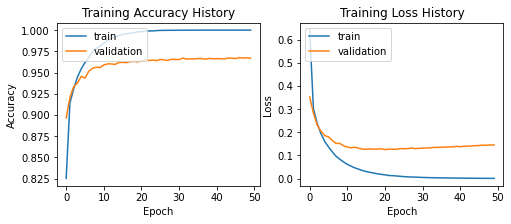

In [9]:

# In[6]: plot
import matplotlib.pyplot as plt

def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(8, 3)
    plt.subplot(121)
    plt.plot(train_history.history["acc"])
    plt.plot(train_history.history["val_acc"])
    plt.title("Training Accuracy History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(train_history.history["loss"])
    plt.plot(train_history.history["val_loss"])
    plt.title("Training Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
def show_train_history_NVAL(train_history):
    fig=plt.gcf()
    fig.set_size_inches(8, 3)
    plt.subplot(121)
    plt.plot(train_history.history["acc"])
    plt.title("Training Accuracy History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train"], loc="upper left")
    plt.subplot(122)
    plt.plot(train_history.history["loss"])
    plt.title("Training Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train"], loc="upper left")
    plt.show()
    
if VAL !=0: show_train_history(NN_train_history) 
else: show_train_history_NVAL(NN_train_history) 


In [20]:

# In[6]: info
print(NN.summary()) 
NN_weights = np.array(NN.get_weights(),dtype=object)
print('weights shape :',NN_weights.shape)
for i in range (0,NN_weights.shape[0],2):
    print('weights 0 shape :',NN_weights[i].shape)
    print('bias 0 shape :',NN_weights[i+1].shape)  
# In[6]: info
print ('\n\n')
print ('#######################################################')
print ('          Convolutional neural network (CNN)           ')
print ('#######################################################')
print ('\n\n')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 256)               200960    
_________________________________________________________________
out (Dense)                  (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None
weights shape : (4,)
weights 0 shape : (784, 256)
bias 0 shape : (256,)
weights 0 shape : (256, 10)
bias 0 shape : (10,)



#######################################################
          Convolutional neural network (CNN)           
###########################

In [21]:
##CNN
def model_CNN(input_shape):
     X_input = Input(input_shape)

 #--------------------------------W1-------------------------------------------- 
     W1 = Conv2D(8, (5, 5), strides = (1, 1), activation = 'relu', name = 'conv1',padding='same')(X_input)
     W1 = MaxPooling2D((2, 2), name='max_pool1_W1')(W1)
     W1 = Conv2D(16, (3, 3), strides = (1, 1), activation = 'relu', name = 'conv2')(W1)

 #--------------------------------W3--------------------------------------------         
     W1 = Flatten()(W1)  
     W1 = Dropout(0.25)(W1)   
 #--------------------------------D1--------------------------------------------
     D1 = Dense(128, activation='relu', name='fc2')(W1)
 #--------------------------------O1--------------------------------------------    
     O1 = Dense(10, activation='softmax', name='out')(D1)    
     
     model_CNN = Model(inputs = X_input, outputs = O1 ,name='NN')
     return model_CNN

In [22]:
# In[4]:  training setup
from keras.callbacks import ModelCheckpoint
complete_time=time.strftime("%Y_%m_%d %H_%M_%S", time.localtime()) 
if VAL !=0:
    checkpoint = ModelCheckpoint("model/Best_CNN_weights_{epoch:02d}_{val_loss:.2f}.h5", 
                                 monitor='val_loss', verbose=0,save_best_only=True, mode='auto', period=1)

CNN=model_CNN((pixel,pixel,1))
print(CNN.summary()) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 8)         208       
_________________________________________________________________
max_pool1_W1 (MaxPooling2D)  (None, 14, 14, 8)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 12, 12, 16)        1168      
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2304)              0         
_________________________________________________________________
fc2 (Dense)                  (None, 128)               295040    
__________

In [23]:
# In[4]:  training
CNN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
if VAL !=0:
    CNN_train_history=CNN.fit(x=train_data,y={"out":train_label},validation_split=VAL, epochs=NUM_EPOCHS,
                       batch_size=BATCH_SIZE,verbose=1, callbacks=[checkpoint])
else:
    CNN_train_history=CNN.fit(x=train_data,y={"out":train_label},validation_split=VAL, epochs=NUM_EPOCHS,
                       batch_size=BATCH_SIZE,verbose=1)
'''    
CNN_train_history=CNN.fit(x=train_data,y={"out":train_label},validation_split=VAL, epochs=NUM_EPOCHS,
                       batch_size=BATCH_SIZE,verbose=1, callbacks=[checkpoint])
'''
complete_time=time.strftime("%Y_%m_%d %H_%M_%S", time.localtime()) 
# In[6]: info
print(CNN.summary()) 
CNN_weights = np.array(CNN.get_weights(),dtype=object)
print('weights shape :',CNN_weights.shape)
for i in range (0,CNN_weights.shape[0],2):
    print('weights 0 shape :',CNN_weights[i].shape)
    print('bias 0 shape :',CNN_weights[i+1].shape)  


Train on 11000 samples, validate on 2750 samples
Epoch 1/15
11000/11000 [==============================] - 5s 448us/step - loss: 1.0735 - acc: 0.7155 - val_loss: 0.4033 - val_acc: 0.8804
Epoch 2/15
11000/11000 [==============================] - 4s 371us/step - loss: 0.3233 - acc: 0.8995 - val_loss: 0.2495 - val_acc: 0.9305
Epoch 3/15
11000/11000 [==============================] - 4s 336us/step - loss: 0.2076 - acc: 0.9374 - val_loss: 0.2064 - val_acc: 0.9335
Epoch 4/15
11000/11000 [==============================] - 4s 345us/step - loss: 0.1632 - acc: 0.9508 - val_loss: 0.1637 - val_acc: 0.9498
Epoch 5/15
11000/11000 [==============================] - 4s 336us/step - loss: 0.1369 - acc: 0.9555 - val_loss: 0.1346 - val_acc: 0.9571
Epoch 6/15
11000/11000 [==============================] - 4s 355us/step - loss: 0.1115 - acc: 0.9643 - val_loss: 0.1251 - val_acc: 0.9618
Epoch 7/15
11000/11000 [==============================] - 4s 358us/step - loss: 0.0996 - acc: 0.9699 - val_loss: 0.1199 - v

In [14]:
# In[5]:  save_weights
CNN.save('CNN_'+str(complete_time)+'.h5')


Test loss :   0.07275  Test accuracy :  0.97620


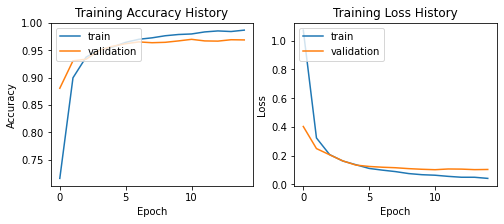

In [24]:

# In[6]:  score
CNN_scores=CNN.evaluate(test_data, {"out":test_label}, verbose=0)  
print('Test loss : ',' {:.5f}'.format(CNN_scores[0]),' Test accuracy :',' {:.5f}'.format(CNN_scores[1]))

if VAL !=0: show_train_history(CNN_train_history) 
else: show_train_history_NVAL(CNN_train_history) 






#######################################################
                       SUMMARY                         
#######################################################



/-------------------------------------------------------
NN.summary():
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 256)               200960    
_________________________________________________________________
out (Dense)                  (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None



/--------------

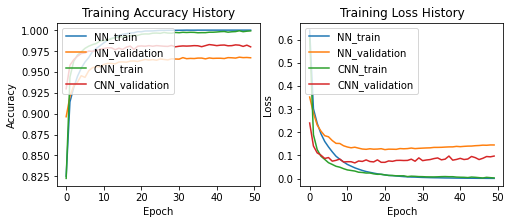

In [16]:

    
# In[6]: Comparison   
print ('\n\n')
print ('#######################################################')
print ('                       SUMMARY                         ')
print ('#######################################################')
print ('\n\n')

print ('/-------------------------------------------------------')
print ('NN.summary():')
print (NN.summary()) 
print ('\n\n')
print ('/-------------------------------------------------------')
print ('CNN.summary():')
print (CNN.summary()) 
print ('\n\n')
print ('/-------------------------------------------------------')
print('NN Test loss : ',' {:.5f}'.format(NN_scores[0]),' NN Test accuracy :',' {:.5f}'.format(NN_scores[1]))
print('CNN Test loss : ',' {:.5f}'.format(CNN_scores[0]),' CNN Test accuracy :',' {:.5f}'.format(CNN_scores[1]))
print ('\n\n')
print ('/-------------------------------------------------------')
def Comparison_train_history(NN,CNN):
    fig=plt.gcf()
    fig.set_size_inches(8, 3)
    plt.subplot(121)
    plt.plot(NN.history["acc"])
    plt.plot(NN.history["val_acc"])
    plt.plot(CNN.history["acc"])
    plt.plot(CNN.history["val_acc"])
    plt.title("Training Accuracy History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["NN_train", "NN_validation","CNN_train", "CNN_validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(NN.history["loss"])
    plt.plot(NN.history["val_loss"])
    plt.plot(CNN.history["loss"])
    plt.plot(CNN.history["val_loss"])
    plt.title("Training Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["NN_train", "NN_validation","CNN_train", "CNN_validation"], loc="upper left")
    plt.show()
def Comparison_train_history_NVAL(NN,CNN):
    fig=plt.gcf()
    fig.set_size_inches(8, 3)
    plt.subplot(121)
    plt.plot(NN.history["acc"])
    plt.plot(CNN.history["acc"])
    plt.title("Training Accuracy History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["NN_train","CNN_train"], loc="upper left")
    plt.subplot(122)
    plt.plot(NN.history["loss"])
    plt.plot(CNN.history["loss"])
    plt.title("Training Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["NN_train","CNN_train"], loc="upper left")
    plt.show()

if VAL !=0: Comparison_train_history(NN_train_history,CNN_train_history)
else: Comparison_train_history_NVAL(NN_train_history,CNN_train_history)